In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

%pip install seaborn -q
import seaborn as sn

Note: you may need to restart the kernel to use updated packages.


In [2]:
irises = load_iris()

In [3]:
scaler = preprocessing.StandardScaler().fit(irises.data)

In [4]:
y = irises.target
labels = irises.target_names
x = scaler.transform(irises.data)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
model.score(X_test, y_test)

0.9

Text(69.0, 0.5, 'Truth')

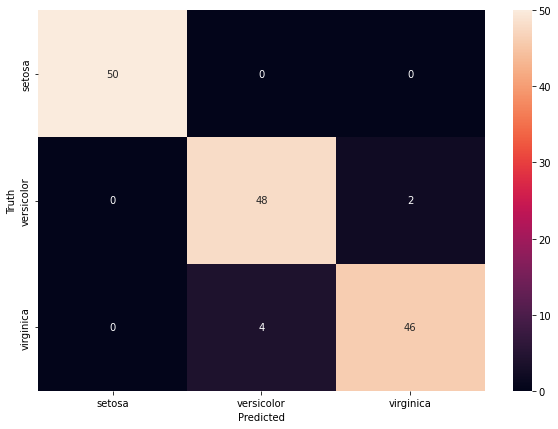

In [8]:
y_predicted = model.predict(x)

predicted_labels = [labels[i] for i in y_predicted]
test_labels = [labels[i] for i in y]

cm = confusion_matrix(test_labels, predicted_labels)
cm_data_frame = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm_data_frame, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')